In [33]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
import pandas_profiling

In [34]:
#Loading the Data
houses = pd.read_csv('train.csv')
holdout_set = pd.read_csv('test.csv')

In [35]:
houses.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [36]:
houses.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [37]:
# Creates a report in order to find the distribution of variables and missing ones.
pandas_profiling.ProfileReport(houses)

Number of variables,81
Number of observations,2051
Total Missing (%),5.9%
Total size in memory,1.3 MiB
Average record size in memory,648.0 B
Numeric,39
Categorical,42
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [38]:
profile = pandas_profiling.ProfileReport(houses) 
profile.to_file(outputfile='./myoutputfile.html')

In [39]:
houses.shape

(2051, 81)

In [40]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [41]:
#Finding correlation of values
houses.corr()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Id,1.000000,0.175793,0.026543,-0.024967,0.032872,-0.061483,-0.026096,-0.064444,-0.090040,-0.035493,-0.045878,0.000723,0.008555,-0.038346,-0.022650,-0.008388,0.011719,-0.023881,-0.033385,0.014381,-0.059086,-0.042054,0.010605,-0.002400,-0.009092,-0.037560,-0.050730,-0.048666,-0.045201,-0.009045,0.001382,0.033747,-0.022791,0.009758,0.055696,-0.012683,0.127723,-0.975747,-0.051398
PID,0.175793,1.000000,-0.003632,-0.091291,0.024135,-0.265863,0.106861,-0.347039,-0.176666,-0.247959,-0.086522,-0.013144,-0.111281,-0.203795,-0.145862,-0.005598,0.072268,-0.112936,-0.030554,-0.001946,-0.179370,-0.163975,0.009122,0.068416,-0.084999,-0.120710,-0.251257,-0.228368,-0.200891,-0.041221,-0.081129,0.150179,-0.024679,-0.042030,0.005825,0.004223,-0.032735,0.008476,-0.255052
MS SubClass,0.026543,-0.003632,1.000000,-0.389790,-0.245484,0.035763,-0.070141,0.035983,0.044836,-0.004047,-0.060854,-0.068265,-0.139911,-0.226038,-0.246212,0.305771,0.031091,0.068210,0.025055,-0.017249,0.142087,0.179404,-0.003516,0.252111,0.034490,-0.055118,0.084954,-0.049148,-0.108228,0.001622,-0.020289,-0.039842,-0.030088,-0.038819,-0.004585,-0.027485,0.013027,-0.032870,-0.087335
Lot Frontage,-0.024967,-0.091291,-0.389790,1.000000,0.574024,0.194808,-0.054455,0.109504,0.085052,0.218218,0.214178,0.036740,0.127605,0.356584,0.463900,0.013700,-0.000300,0.383856,0.111441,-0.030858,0.152812,0.035842,0.220414,0.015856,0.362704,0.253456,0.067865,0.297143,0.358457,0.115180,0.184958,-0.003302,0.031855,0.074819,0.156575,0.051676,-0.017389,0.009112,0.341842
Lot Area,0.032872,0.024135,-0.245484,0.574024,1.000000,0.105824,-0.019185,0.036002,0.050771,0.169379,0.215430,0.041717,0.041184,0.277175,0.381593,0.029398,0.001273,0.327427,0.116128,0.029980,0.125601,0.049995,0.139060,-0.013484,0.238724,0.289467,0.004882,0.214954,0.263296,0.155623,0.140864,0.014139,0.019553,0.067714,0.115102,0.093922,0.003197,-0.029454,0.296566
Overall Qual,-0.061483,-0.265863,0.035763,0.194808,0.105824,1.000000,-0.082770,0.602964,0.584654,0.438685,0.278742,-0.028199,0.275773,0.548742,0.477136,0.228152,-0.052338,0.566701,0.175171,-0.047318,0.515080,0.274859,0.053373,-0.170964,0.382025,0.388920,0.574553,0.587423,0.563814,0.257081,0.308855,-0.154554,0.031938,0.048752,0.006558,0.022099,0.019242,-0.011578,0.800207
Overall Cond,-0.026096,0.106861,-0.070141,-0.054455,-0.019185,-0.082770,1.000000,-0.370988,0.042614,-0.135878,-0.045768,0.047810,-0.130521,-0.158643,-0.150938,0.010912,0.004753,-0.109804,-0.039113,0.100324,-0.219189,-0.093266,-0.009908,-0.095725,-0.093576,-0.006463,-0.331765,-0.168513,-0.137917,0.011034,-0.052266,0.108320,0.026907,0.047359,-0.005806,0.014269,-0.003144,0.047664,-0.097019
Year Built,-0.064444,-0.347039,0.035983,0.109504,0.036002,0.602964,-0.370988,1.000000,0.629116,0.329741,0.275440,-0.021031,0.136662,0.410254,0.323315,0.022313,-0.159403,0.258838,0.215200,-0.031464,0.480169,0.283207,-0.042149,-0.127162,0.137783,0.168848,0.825316,0.542544,0.487177,0.216339,0.207798,-0.380082,0.016104,-0.037866,0.003728,0.000626,-0.007083,-0.003559,0.571849
Year Remod/Add,-0.090040,-0.176666,0.044836,0.085052,0.050771,0.584654,0.042614,0.629116,1.000000,0.211443,0.166680,-0.057163,0.160066,0.308545,0.244190,0.159605,-0.066577,0.322407,0.153507,-0.037923,0.471555,0.224106,-0.019748,-0.135926,0.202397,0.138858,0.674024,0.441796,0.398999,0.216271,0.264476,-0.237523,0.040416,-0.041211,-0.022382,-0.001704,0.011568,0.042744,0.550370
Mas Vnr Area,-0.035493,-0.247959,-0.004047,0.218218,0.169379,0.438685,-0.135878,0.329741,0.211443,1.000000,0.321807,-0.016756,0.085853,0.4085

In [42]:
# Picking variables that correlate with salesprice and creating a new dataframe.
the_house= houses[['SalePrice','Overall Qual','Garage Cars','Garage Area','Total Bsmt SF','1st Flr SF','Gr Liv Area','Year Built','Year Remod/Add','Total Bsmt SF']]
the_house

,SalePrice,Overall Qual,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Year Built,Year Remod/Add,Total Bsmt SF
0,130500,6,2.0,475.0,725.0,725,1479,1976,2005,725.0
1,220000,7,2.0,559.0,913.0,913,2122,1996,1997,913.0
2,109000,5,1.0,246.0,1057.0,1057,1057,1953,2007,1057.0
3,174000,5,2.0,400.0,384.0,744,1444,2006,2007,384.0
4,138500,6,2.0,484.0,676.0,831,1445,1900,1993,676.0
5,190000,6,2.0,578.0,1517.0,1888,1888,1966,2002,1517.0
6,140000,6,2.0,525.0,547.0,1072,1072,2005,2006,547.0
7,142000,5,2.0,531.0,1188.0,1188,1188,1959,1959,1188.0
8,112500,5,1.0,420.0,924.0,924,924,1952,1952,924.0
9,135000,5,2.0,504.0,1040.0,1040,2080,1969,1969,1040.0


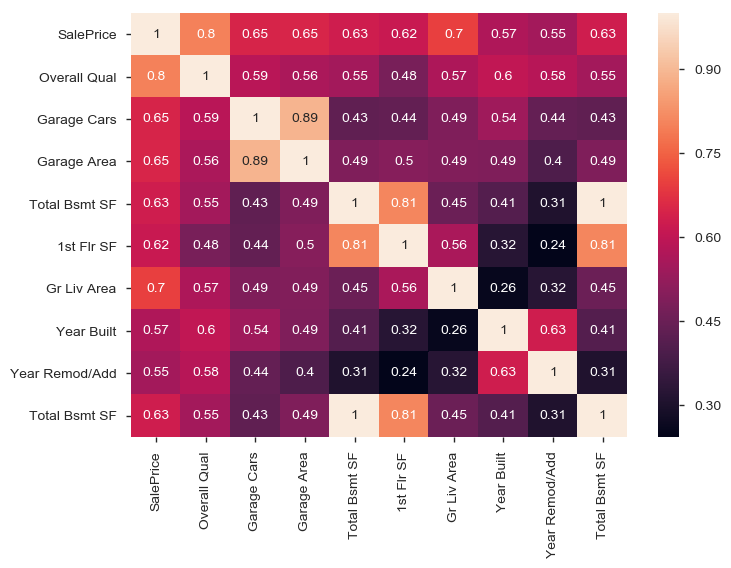

In [43]:
#Correlation Matrix
sns.heatmap(the_house.corr(),annot=True);

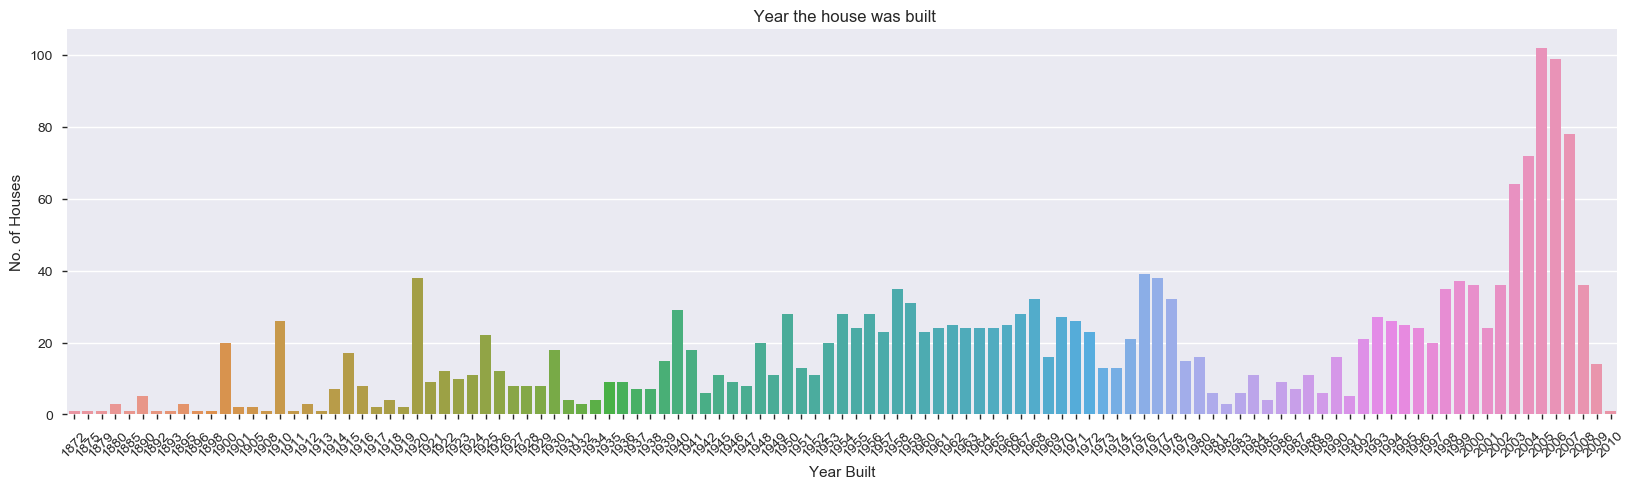

In [44]:
#Plotting the year the house was built
fig=plt.rcParams['figure.figsize']=20,5
fig=sns.countplot(x='Year Built', data=houses)
fig.set_title(" Year the house was built")
fig.set(xlabel='Year Built', ylabel='No. of Houses')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45);

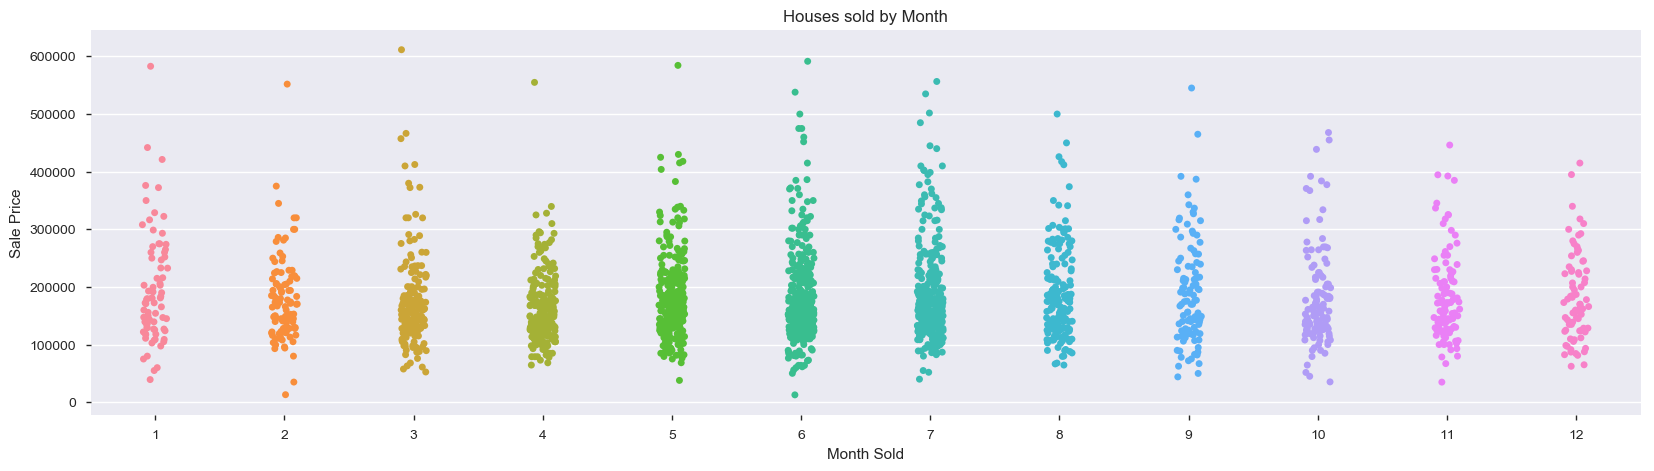

In [45]:

fig=sns.stripplot(x='Mo Sold',y='SalePrice', data=houses)
fig.set_title('Houses sold by Month')
fig.set(xlabel='Month Sold', ylabel='Sale Price');

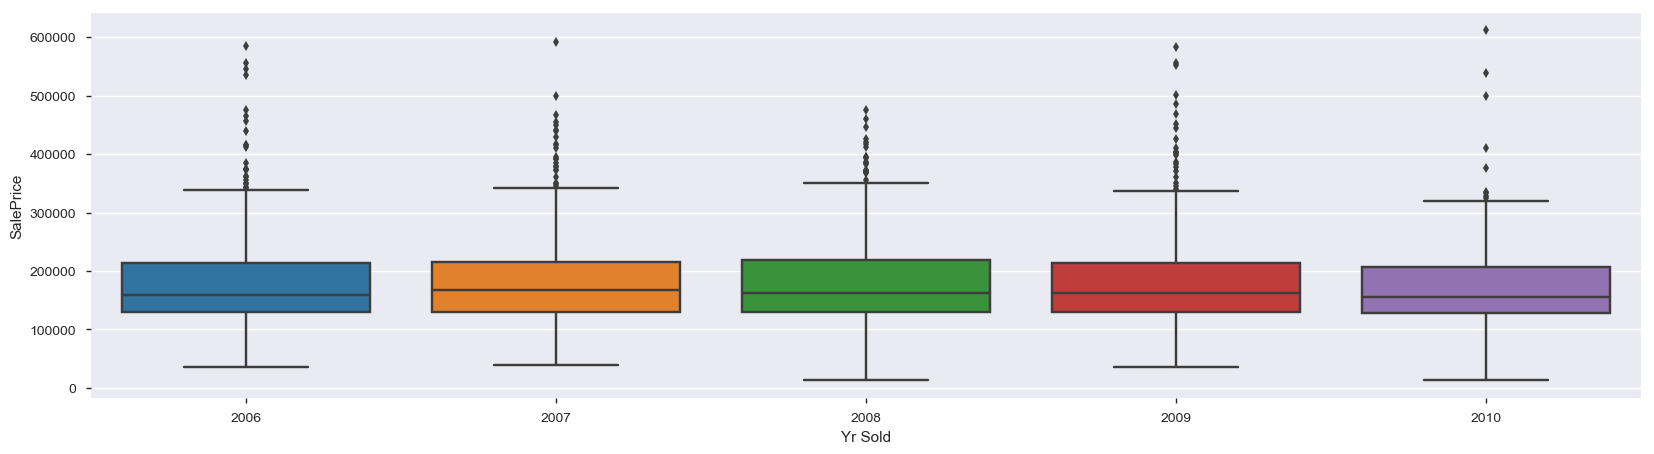

In [46]:
sns.boxplot(x='Yr Sold',y='SalePrice', data=houses);

In [47]:
#Finding Null values
houses.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
                  ... 
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area

In [48]:
#Filling in Null values
houses["Garage Cars"] = houses['Garage Cars'].fillna(value=houses["Garage Cars"].mean())

In [49]:
#Filling in Null values
houses["Garage Area"] = houses['Garage Area'].fillna(value=houses["Garage Area"].mean())

In [50]:
#Filling in Null values
houses["Total Bsmt SF"] = houses['Total Bsmt SF'].fillna(value=houses["Total Bsmt SF"].mean())

In [51]:
#Filling in Null values
houses["1st Flr SF"] = houses['1st Flr SF'].fillna(value=houses["1st Flr SF"].mean())

In [52]:
#Filling in Null values
houses["Gr Liv Area"] = houses['Gr Liv Area'].fillna(value=houses["Gr Liv Area"].mean())

In [53]:
#Filling in Null values
houses['Mas Vnr Area'] = houses['Mas Vnr Area'].fillna(0)

In [54]:
#Filling in Null values
houses["Garage Yr Blt"] = houses['Garage Yr Blt'].fillna(0)

In [55]:
#Checking for Null Values
houses.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area         0
Exter Qual           0
Exter Cond           0
                  ... 
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt        0
Garage Finish      114
Garage Cars          0
Garage Area

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [57]:
# Setting predictor and target variables
features = ['Overall Qual','Garage Cars','Garage Area','Total Bsmt SF','1st Flr SF','Gr Liv Area','Year Built','Year Remod/Add',]
X = houses[features]
y = houses['SalePrice']

In [58]:
#Splitting train and test variables
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [59]:
linreg = LinearRegression()

In [60]:
#Cross Validation score
scores = cross_val_score(linreg, X_train, y_train)
print(scores)
print(scores.mean())

[0.79891896 0.81030481 0.63720207]
0.7488086101702983


In [61]:
#Fitting model
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
linreg.coef_

array([2.06108624e+04, 6.49882515e+03, 2.92663810e+01, 1.66005105e+01,
       1.50619829e+01, 4.33813826e+01, 2.24121658e+02, 3.12882271e+02])

In [63]:
#Score on Training set
linreg.score(X_train, y_train)

0.774838293497971

In [64]:
#Score on Testing set
linreg.score(X_test,y_test)

0.8370241648283582

In [65]:
X_holdout = holdout_set[features]

In [66]:
y_preds= linreg.predict(X_holdout)

In [67]:
my_ids = holdout_set['Id']

In [68]:
df = pd.DataFrame()

In [69]:
df['Id'] = my_ids

In [70]:
df['SalePrice'] = y_preds

In [71]:
df.set_index('Id', inplace=True)

In [72]:
df.to_csv('my_preds.csv')

In [73]:
#Start of the Ridge model 

In [74]:
houses.fillna(0, inplace=True)

In [75]:
houses.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
Alley             0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Overall Qual      0
Overall Cond      0
Year Built        0
Year Remod/Add    0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Mas Vnr Area      0
Exter Qual        0
Exter Cond        0
                 ..
Half Bath         0
Bedroom AbvGr     0
Kitchen AbvGr     0
Kitchen Qual      0
TotRms AbvGrd     0
Functional        0
Fireplaces        0
Fireplace Qu      0
Garage Type       0
Garage Yr Blt     0
Garage Finish     0
Garage Cars       0
Garage Area       0
Garage Qual       0
Garage Cond       0
Paved Drive       0
Wood Deck SF      0
Open Porch SF     0
Enclosed Porch    0


In [76]:
#For Loop categorical columns
categorical_cols = []
for i in range(len(houses.dtypes)):
    if houses.dtypes[i] == 'object':
        categorical_cols.append(houses.columns[i])

In [77]:
#Seeing if it works
houses[categorical_cols]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type
0,RL,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,0,Attchd,RFn,TA,TA,Y,0,0,0,WD
1,RL,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,0,0,0,WD
2,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,0,Detchd,Unf,TA,TA,Y,0,0,0,WD
3,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,0,BuiltIn,Fin,TA,TA,Y,0,0,0,WD
4,RL,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,0,Detchd,Unf,TA,TA,N,0,0,0,WD
5,RL,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,NAmes,PosA,Norm,1Fam,1Story,Gable,CompShg,BrkFace,Plywood,None,Gd,TA,CBlock,TA,TA,No,ALQ,Rec,GasA,Ex,Y,SBrkr,Gd,Mod,Gd,Attchd,Fin,TA,TA,Y,0,0,0,WD
6,RM,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SFoyer,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,Gd,TA,Gd,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,0,Basment,Fin,TA,TA,Y,0,0,0,New
7,RL,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Plywood,Plywood,BrkFace,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,Fa,Y,SBrkr,TA,Typ,0,Attchd,RFn,TA,TA,Y,0,MnPrv,0,COD
8,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,0,Detchd,Unf,TA,TA,Y,0,MnPrv,Shed,WD
9,RL,Pave,0,IR1,HLS,AllPub,Inside,Sev,NAmes,Norm,Norm,1Fam,2Story,Gable,CompShg,Plywood,Plywood,BrkFace,TA,TA,PConc,Gd,TA,Av,Rec,Unf,GasA,TA,Y,SBrkr,Fa,Typ,TA,Attchd,Unf,TA,TA,Y,0,0,0,WD


In [78]:
#creating dummy variable
dummified= pd.get_dummies(houses[categorical_cols], drop_first=True)

In [79]:
#initiating for loop
numerical_cols = []
for i in range(len(houses.dtypes)):
    if houses.dtypes[i] == 'int64' or houses.dtypes[i] == 'float64':
        numerical_cols.append(houses.columns[i])

In [80]:
#Creating the numerical dataset
numerical_df = houses[numerical_cols]

In [81]:
# Creating the dummy dataset
dummified_df = pd.get_dummies(houses[categorical_cols], drop_first=True)

In [82]:
#Merging the two
merged_df= pd.concat([numerical_df, dummified_df],axis=1)
merged_df

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,Lot Shape_IR2,Lot Shape_IR3,...,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Ex,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_Fin,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Ex,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Ex,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Pool QC_Ex,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Elev,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,533352170,60,0.0,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010,130500,0,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,4,2009,220000,0,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,0,1,2010,109000,0,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,0,4,2010,174000,0,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,0,3,2010,138500,0,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,138,535126040,20,137.0,16492,6,6,1966,2002,0.0,247.0,713.0,557.0,1517.0,1888,0,0,1888,0.0,0.0,2,1,2,1,6,1,1966.0,2.0,578.0,0,0,0,0,0,0,0,6,2010,190000,0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,2827,908186070,180,35.0,3675,6,5,2005,2006,82.0,547.0,0.0,0.0,547.0,1072,0,0,1072,1.0,0.0,2,0,2,1,5,0,2005.0,2.0,525.0,0,44,0,0,0,0,0,6,2006,140000,0,0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,145,535154050,20,0.0,12160,5,5,1959,1959,180.0,1000.0,0.0,188.0,1188.0,1188,0,0,1188,1.0,0.0,1,0,3,1,6,0,1959.0,2.0,531.0,0,0,0,0,0,0,0,5,2010,142000,0,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1942,535353130,20,0.0,15783,5,5,1952,1952,0.0,292.0,0.0,632.0,924.0,924,0,0,924,0.0,0.0,1,0,2,1,6,0,1952.0,1.0,420.0,0,324,0,0,0,0,400,6,2007,112500,0,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
9,1956,535426130,60,70.0,11606,5,5,1969,1969,192.0,650.0,0.0,390.0,1040.0,1040,1040,0,2080,0.0,1.0,1,2,5,1,9,2,1969.0,2.

In [83]:
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.preprocessing import StandardScaler

In [84]:
#Initializing ridge model
r = Ridge()

In [85]:
r_alphas = np.logspace(0, 5, 200)
ridge_model = RidgeCV(alphas=r_alphas, store_cv_values=True)
ridge_model = ridge_model.fit(X_train, y_train)

In [86]:
#Setting the target and predictor variables
X= merged_df.drop('SalePrice',axis=1)
Y = merged_df['SalePrice']

In [87]:
#Splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [88]:
# Scaling data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [89]:
#Fitting model
r.fit(X_train_scaled, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [90]:
#Cross validation score
scores = cross_val_score(r, X_train_scaled, y_train)
print(scores)
print(scores.mean())

[0.77554036 0.58528996 0.60846327]
0.656431197986774


In [91]:
#Score of the training set
r.score(X_train_scaled, y_train)

0.9450411061107485

In [92]:
#Score of the testing set (Ridge)
r.score(X_test_scaled,y_test)

0.9176988717926299